In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [19]:
df = pd.read_csv("data.csv")
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


Feature Engineering

In [20]:
df['TotalVisiting'] = df['NumberOfChildrenVisiting'] + df['NumberOfPersonVisiting']
df.head(1)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,TotalVisiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0,3.0


In [21]:
#delete those columns
df.drop(columns=['NumberOfChildrenVisiting','NumberOfPersonVisiting'], inplace=True, axis=1)

In [22]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [23]:
# get all the numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
print(numerical_features)
print(f'Number of numerical features are : {len(numerical_features)}')

Index(['ProdTaken', 'Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisiting'],
      dtype='object')
Number of numerical features are : 12


In [24]:
# get all the categorical features
categorical_features = df.select_dtypes(include=['object']).columns
print(categorical_features)
print(f'Number of categorical features are : {len(categorical_features)}')

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')
Number of categorical features are : 6


In [25]:
# discrete features - variables or attributes in a dataset that can take on only specific, distinct values — usually countable and often integers.
discrete_features = [feature for feature in numerical_features if len(df[feature].unique())<=25 ]
print(f'NUmber of discrete features : {len(discrete_features)}')

NUmber of discrete features : 9


In [26]:
# Continuous features - variables that can take on any value within a given range, including decimal and fractional values. They typically represent measurements rather than counts.
continuous_features = [feature for feature in numerical_features if feature not in discrete_features]
print(f'Number of continuous features : {len(continuous_features)}')

Number of continuous features : 3


In [27]:
# Seperating the dependent and independent data
from sklearn.model_selection import train_test_split
X = df.drop('ProdTaken', axis=1)
y = df['ProdTaken']

In [28]:
y.value_counts()
# random forest and decision tree works well with imbalanced data

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [29]:
# Train test split the model
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((3910, 17), (978, 17))

In [30]:
# Create column transformer with 3 types of transformers
# Column Transformer --> A ColumnTransformer is a powerful utility in Scikit-learn that allows you 
# to apply different preprocessing steps to different columns of a dataset — all in a single, unified pipeline.
cat_features = X.select_dtypes(include='object').columns
num_features = X.select_dtypes(exclude='object').columns

In [31]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ('OneHotEncoder',oh_transformer , cat_features),
        ('StandardScaler',numeric_transformer ,num_features),
    ]
)
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisiting'],
      dtype='object'))])

In [32]:
# Applying transformation on training data use fit_transform
X_train = preprocessor.fit_transform(X_train)

In [33]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,-1.020350,1.284279,-0.725271,-0.127737,-0.632399,0.679690,0.782966,-0.382245,-0.774151
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.721400,0.690023,0.282777,-0.725271,1.511598,-0.632399,0.679690,0.782966,-0.459799,0.643615
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,-1.020350,0.282777,1.771041,0.418708,-0.632399,0.679690,0.782966,-0.245196,-0.065268
3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,-0.721400,-1.020350,1.284279,-0.725271,-0.127737,-0.632399,1.408395,-1.277194,0.213475,-0.065268
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,2.400396,-1.720227,-0.725271,1.511598,-0.632399,-0.049015,-1.277194,-0.024889,2.061382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,-0.653841,1.284279,-0.725271,-0.674182,-0.632399,-1.506426,0.782966,-0.536973,0.643615
3906,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.455047,-0.898180,-0.718725,1.771041,-1.220627,-0.632399,1.408395,0.782966,1.529609,-0.065268
3907,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.455047,1.545210,0.282777,-0.725271,2.058043,-0.632399,-0.777720,0.782966,-0.360576,0.643615
3908,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.455047,1.789549,1.284279,-0.725271,-0.127737,-0.632399,-1.506426,0.782966,-0.252799,0.643615


In [34]:
# Applying transformation on test data use transform
X_test = preprocessor.transform(X_test)

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, precision_score,recall_score, f1_score, \
    classification_report, accuracy_score,roc_auc_score, roc_curve

In [37]:
models = {
    'Random Forest' : RandomForestClassifier(),
    'Decision Tree' : DecisionTreeClassifier(),
    'SVC' : SVC(),
    'Gradient Boost' : GradientBoostingClassifier()
}

for i in range(len(list(models))):
    model = list(models.values())[i] # Gives all the model objects in a list so we use the i-th model
    model.fit(X_train,y_train) # Model training

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train,y_train_pred, average="weighted")
    model_train_precision = precision_score(y_train,y_train_pred)
    model_train_recall = recall_score(y_train,y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)

    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test,y_test_pred, average="weighted")
    model_test_precision = precision_score(y_test,y_test_pred)
    model_test_recall = recall_score(y_test,y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test_pred,y_test_pred)

    print(list(models.keys())[i]) # Print the name of the i-th model in the list of keys of the model names

    print('Model Performance For Training Set')
    print('- Accuracy : {:.4f}'.format(model_train_accuracy))
    print('- F1 Score : {:.4f}'.format(model_train_f1))
    print('- Precision : {:.4f}'.format(model_train_precision))
    print('- Recall : {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score : {:.4f}'.format(model_train_rocauc_score))

    print('------------------------------------')

    print('Model Performance For Test Set')
    print('- Accuracy : {:.4f}'.format(model_test_accuracy))
    print('- F1 Score : {:.4f}'.format(model_test_f1))
    print('- Precision : {:.4f}'.format(model_test_precision))
    print('- Recall : {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score : {:.4f}'.format(model_test_rocauc_score))

    print('='*35)

Random Forest
Model Performance For Training Set
- Accuracy : 1.0000
- F1 Score : 1.0000
- Precision : 1.0000
- Recall : 1.0000
- Roc Auc Score : 1.0000
------------------------------------
Model Performance For Test Set
- Accuracy : 0.9305
- F1 Score : 0.9248
- Precision : 0.9843
- Recall : 0.6545
- Roc Auc Score : 1.0000
Decision Tree
Model Performance For Training Set
- Accuracy : 1.0000
- F1 Score : 1.0000
- Precision : 1.0000
- Recall : 1.0000
- Roc Auc Score : 1.0000
------------------------------------
Model Performance For Test Set
- Accuracy : 0.9182
- F1 Score : 0.9170
- Precision : 0.8136
- Recall : 0.7539
- Roc Auc Score : 1.0000
SVC
Model Performance For Training Set
- Accuracy : 0.9013
- F1 Score : 0.8899
- Precision : 0.9173
- Recall : 0.5171
- Roc Auc Score : 0.7532
------------------------------------
Model Performance For Test Set
- Accuracy : 0.8650
- F1 Score : 0.8434
- Precision : 0.8471
- Recall : 0.3770
- Roc Auc Score : 1.0000
Gradient Boost
Model Performance Fo

In [41]:
# Hyperparameter Tuning 
# Hyperparameters for random forest 
# we can have different hyperparameter var for different models
rf_params = {
    'max_depth' : [5,8,15,None,10],
    'max_features' : [5,7,'auto',8],
    'min_samples_split' : [2,8,15,20],
    'n_estimators' : [100,200,500,1000]
}

gradient_params = {
    'loss' : ['log_loss','deviance','exponential'],
    'criterion' : ['friedman_mse','squared_error','mse'],
    'min_samples_split' : [2,8,15,20],
    'max_depth' : [5,8,15,None,10],
    'learning_rate' : [0.1,0.5,1,0.01],
    'n_estimators' : [100,200,500]
}

In [42]:
# Model list for hyperparameter tuning
randomcv_model = [
    ('Random Forest', RandomForestClassifier(), rf_params),  # list of tuples for model name, model object and model hyperparameters
    ('Gradient Boosting', GradientBoostingClassifier(), gradient_params)
]
randomcv_model

[('Random Forest',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 15, None, 10],
   'max_features': [5, 7, 'auto', 8],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]}),
 ('Gradient Boosting',
  GradientBoostingClassifier(),
  {'loss': ['log_loss', 'deviance', 'exponential'],
   'criterion': ['friedman_mse', 'squared_error', 'mse'],
   'min_samples_split': [2, 8, 15, 20],
   'max_depth': [5, 8, 15, None, 10],
   'learning_rate': [0.1, 0.5, 1, 0.01],
   'n_estimators': [100, 200, 500]})]

In [43]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}  # Empty dict, This will hold the best hyperparameters for each model after tuning.

# Looping thru each model in randomcv_model
for name, model, params in randomcv_model:
    random = RandomizedSearchCV(estimator=model,
                                param_distributions=params,n_jobs=-1,
                                cv=3, n_iter=100, verbose=2,random_state=42)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_  # get the best parameters from the search and store them with the model name as key.

    for model_name in model_param :
        print(f'----------------Best Parameters for {model_name} --------------------')
        print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
----------------Best Parameters for Random Forest --------------------
{'n_estimators': 500, 'min_samples_split': 2, 'max_features': 7, 'max_depth': None}
Fitting 3 folds for each of 100 candidates, totalling 300 fits
----------------Best Parameters for Random Forest --------------------
{'n_estimators': 500, 'min_samples_split': 2, 'max_features': 7, 'max_depth': None}
----------------Best Parameters for Gradient Boosting --------------------
{'n_estimators': 500, 'min_samples_split': 8, 'max_depth': 10, 'loss': 'log_loss', 'learning_rate': 0.5, 'criterion': 'friedman_mse'}


In [44]:
model_param

{'Random Forest': {'n_estimators': 500,
  'min_samples_split': 2,
  'max_features': 7,
  'max_depth': None},
 'Gradient Boosting': {'n_estimators': 500,
  'min_samples_split': 8,
  'max_depth': 10,
  'loss': 'log_loss',
  'learning_rate': 0.5,
  'criterion': 'friedman_mse'}}

In [47]:
# Using the best parameters for random forest
models = {
    'Random Forest' : RandomForestClassifier(n_estimators=500,min_samples_split=2,max_features=7,max_depth=None),
    'Gradient Boosting' : GradientBoostingClassifier(n_estimators=500,min_samples_split=8,max_depth=10,loss='log_loss',learning_rate=0.5,criterion='friedman_mse')
}

for i in range(len(list(models))):
    model = list(models.values())[i] # Gives all the model objects in a list so we use the i-th model
    model.fit(X_train,y_train) # Model training

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train,y_train_pred, average="weighted")
    model_train_precision = precision_score(y_train,y_train_pred)
    model_train_recall = recall_score(y_train,y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)

    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test,y_test_pred, average="weighted")
    model_test_precision = precision_score(y_test,y_test_pred)
    model_test_recall = recall_score(y_test,y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test_pred,y_test_pred)

    print(list(models.keys())[i]) # Print the name of the i-th model in the list of keys of the model names

    print('Model Performance For Training Set')
    print('- Accuracy : {:.4f}'.format(model_train_accuracy))
    print('- F1 Score : {:.4f}'.format(model_train_f1))
    print('- Precision : {:.4f}'.format(model_train_precision))
    print('- Recall : {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score : {:.4f}'.format(model_train_rocauc_score))

    print('------------------------------------')

    print('Model Performance For Test Set')
    print('- Accuracy : {:.4f}'.format(model_test_accuracy))
    print('- F1 Score : {:.4f}'.format(model_test_f1))
    print('- Precision : {:.4f}'.format(model_test_precision))
    print('- Recall : {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score : {:.4f}'.format(model_test_rocauc_score))

    print('='*35)

Random Forest
Model Performance For Training Set
- Accuracy : 1.0000
- F1 Score : 1.0000
- Precision : 1.0000
- Recall : 1.0000
- Roc Auc Score : 1.0000
------------------------------------
Model Performance For Test Set
- Accuracy : 0.9315
- F1 Score : 0.9269
- Precision : 0.9559
- Recall : 0.6806
- Roc Auc Score : 1.0000
Gradient Boosting
Model Performance For Training Set
- Accuracy : 1.0000
- F1 Score : 1.0000
- Precision : 1.0000
- Recall : 1.0000
- Roc Auc Score : 1.0000
------------------------------------
Model Performance For Test Set
- Accuracy : 0.9550
- F1 Score : 0.9533
- Precision : 0.9682
- Recall : 0.7958
- Roc Auc Score : 1.0000


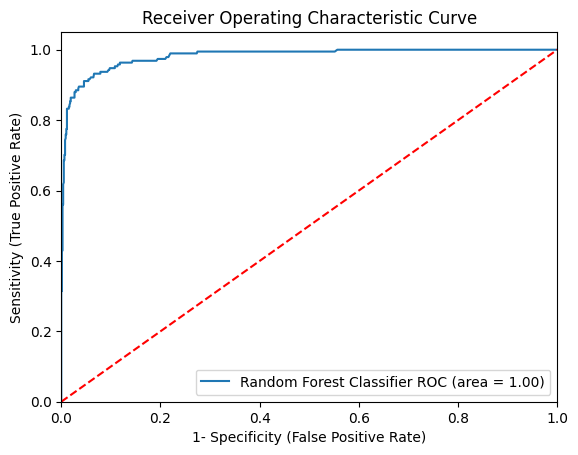

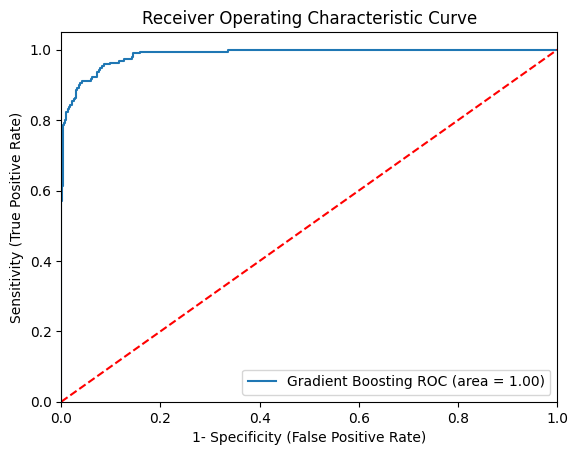

In [49]:
# Plot the ROC AUC Curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
plt.figure()

# Add the models to the list that you want to view on the roc plot

auc_models = [
    {
        'label' : 'Random Forest Classifier',
        'model' : RandomForestClassifier(n_estimators=1000,min_samples_split=2,max_features=7,max_depth=None),
        'auc' : 1.0000
    },
    {
        'label' : 'Gradient Boosting',
        "model" : GradientBoostingClassifier(n_estimators=500,min_samples_split=8,max_depth=10,loss='log_loss',learning_rate=0.5,criterion='friedman_mse'),
        'auc' : 1.0000
    }
]

# Create a loop through all models
for algo in auc_models:
    model = algo['model'] # Select the model
    model.fit(X_train, y_train) # Train the model
    
    # Compute false positive and True positive rate
    fpr,tpr,thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

    # Calculate Area under the curve to display on the plot
    plt.plot(fpr,tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))

    # Custom settings for the plot 
    plt.plot([0,1],[0,1], 'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('1- Specificity (False Positive Rate)')
    plt.ylabel('Sensitivity (True Positive Rate)')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc='lower right')
    plt.savefig('auc.png')
    plt.show()